In [14]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from treesampling.algorithms.castaway import CastawayRST
from treesampling.algorithms import wilson_rst
import treesampling.utils.graphs as tg
import treesampling.utils.visualization as tv

# Experiment (time performance)
In Figure 2 they show, for different bottlenecks, the time performances of FF sampling (Tam et al. 2024) and Aldous/Broder (or Wilson).

Figure 2a:
- 500 nodes, two blocks with |V1| = |V2| = 250 nodes.
- $w_{ij} = u_{ij} b_{ij}$, $u_{ij} \sim U(0,1)$, $b_{ij} = 1$ if $i$ and $j$ are in the same block,
 $b_{ij} \sim \text{Bern}(\zeta)$ otherwise, with $\zeta \in (0.5, 0.1, 0.05, 0.01)$
- 10 samples



In [9]:
n_nodes = 100  # 500
n_blocks = 2
zeta = [0.2, 0.05, 0.01, 0.001]  # [0.5, 0.1, 0.05, 0.01]
sample_size = 10

In [10]:
# Generate the graph exactly as described in the paper
time_record = []
graph_record = []
for z in zeta:
    G = tg.random_block_matrix_graph(n_nodes, n_blocks, log_probs=False, p=z, symmetric=True)
    graph_record.append(G)
    # Castaway
    castaway = CastawayRST(G, root=0, trick=True)
    start_cast = time.time()
    castaway_samples = castaway.sample(sample_size)
    tot_time_cast = time.time() - start_cast
    # Wilson
    start_wilson = time.time()
    for i in range(sample_size):
        wilson_rst(G)
    tot_time_wilson = time.time() - start_wilson
    
    time_record.append((tot_time_cast, tot_time_wilson))
    # Compare the samples
    print(f"Zeta: {z}")
    print("Execution times over 10 samples (total in seconds):")
    print(f"Castaway {tot_time_cast}")
    print(f"Wilson {tot_time_wilson}")

Zeta: 0.2
Castaway time: 29.132346153259277
Wilson time: 0.17778778076171875
Zeta: 0.05
Castaway time: 28.869520902633667
Wilson time: 0.18225812911987305
Zeta: 0.01
Castaway time: 32.62675213813782
Wilson time: 0.23291707038879395
Zeta: 0.001
Castaway time: 34.22097897529602
Wilson time: 0.23899316787719727


In [21]:
def plot_heatmap(G: nx.DiGraph, ax: plt.Axes = None, title: str = None):
    if ax is None:
        fig, ax = plt.subplots()
    weights = nx.to_numpy_array(G)
    sns.heatmap(weights, ax=ax, cbar=False)
    ax.set_title(title)
    return ax

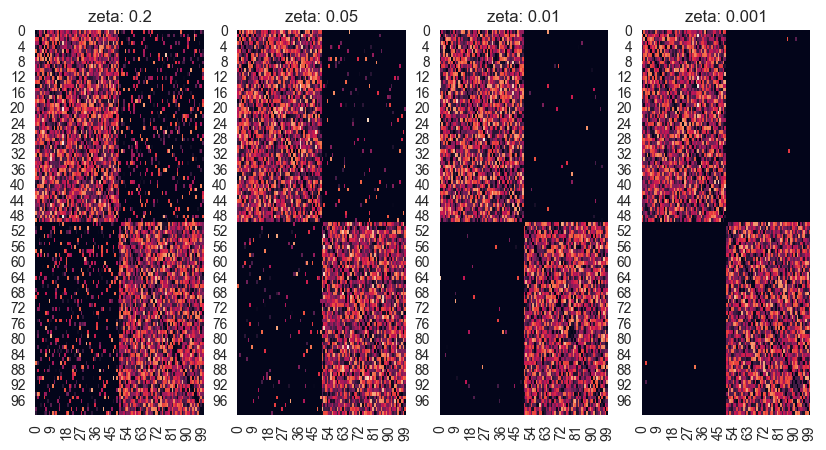

In [22]:
# plot graphs heatmaps
fig, axs = plt.subplots(1, len(zeta), figsize=(16, 4))
fig.suptitle("Block matrix with random Bernoulli weights")
for i, G in enumerate(graph_record):
    plot_heatmap(G, ax=axs[i], title=f"zeta: {zeta[i]}")


# Quick jump to blocks via Bernoulli success

Since some weights are still high between blocks, there is much higher chance to jump to the other block.

Next we try with a fixed low weight between blocks.

In [23]:
# with inbetween blocks weight fixed to low value

graph_record = []
time_record = []
for z in zeta:
    G = tg.random_weakly_connected_k_subgraphs(n_nodes, n_blocks, log_probs=False, weak_weight=z)
    graph_record.append(G)
    # Castaway
    castaway = CastawayRST(G, root=0, trick=True)
    start_cast = time.time()
    castaway_samples = castaway.sample(sample_size)
    tot_time_cast = time.time() - start_cast
    # Wilson
    start_wilson = time.time()
    for i in range(sample_size):
        wilson_rst(G)
    tot_time_wilson = time.time() - start_wilson

    time_record.append((tot_time_cast, tot_time_wilson))
    # Compare the samples
    print(f"Zeta: {z}")
    print("Execution times over 10 samples (total in seconds):")
    print(f"Castaway {tot_time_cast}")
    print(f"Wilson {tot_time_wilson}")


Zeta: 0.2
Execution times over 10 samples (total in seconds):
Castaway 30.66475486755371
Wilson 0.19779515266418457
Zeta: 0.05
Execution times over 10 samples (total in seconds):
Castaway 34.60707712173462
Wilson 0.22881627082824707
Zeta: 0.01
Execution times over 10 samples (total in seconds):
Castaway 38.148122787475586
Wilson 0.20583319664001465
Zeta: 0.001
Execution times over 10 samples (total in seconds):
Castaway 29.355124950408936
Wilson 0.2760579586029053


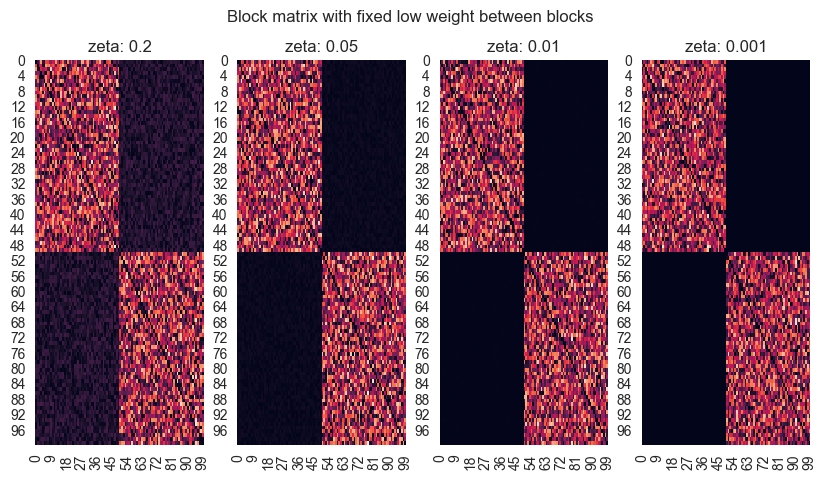

In [25]:
# plot graphs heatmaps
fig, axs = plt.subplots(1, len(zeta), figsize=(16, 4))
fig.suptitle("Block matrix with fixed low weight between blocks")
for i, G in enumerate(graph_record):
    plot_heatmap(G, ax=axs[i], title=f"zeta: {zeta[i]}")

## Wilson finds its way despite low weights between blocks

This time all connections between blocks are low, but still Wilson is faster than Castaway. That is
due to the large number of nodes (high number of nodes makes the relative weight of the bottleneck low).

Next we try with a higher number of blocks and lower weight between blocks.

In [28]:
# now more blocks and lower connectivity
n_blocks = 10
zeta = [1e-5, 2e-6]

graph_record = []
time_record = []
for z in zeta:
    G = tg.random_weakly_connected_k_subgraphs(n_nodes, n_blocks, log_probs=False, weak_weight=z)
    graph_record.append(G)
    # Castaway
    castaway = CastawayRST(G, root=0, trick=True)
    start_cast = time.time()
    castaway_samples = castaway.sample(sample_size)
    tot_time_cast = time.time() - start_cast
    # Wilson
    start_wilson = time.time()
    for i in range(sample_size):
        wilson_rst(G)
    tot_time_wilson = time.time() - start_wilson

    time_record.append((tot_time_cast, tot_time_wilson))
    # Compare the samples
    print(f"Zeta: {z}")
    print("Execution times over 10 samples (total in seconds):")
    print(f"Castaway {tot_time_cast}")
    print(f"Wilson {tot_time_wilson}")

Zeta: 1e-05
Execution times over 10 samples (total in seconds):
Castaway 41.18613815307617
Wilson 20.624068021774292
Zeta: 2e-06
Execution times over 10 samples (total in seconds):
Castaway 39.75215792655945
Wilson 82.31316924095154


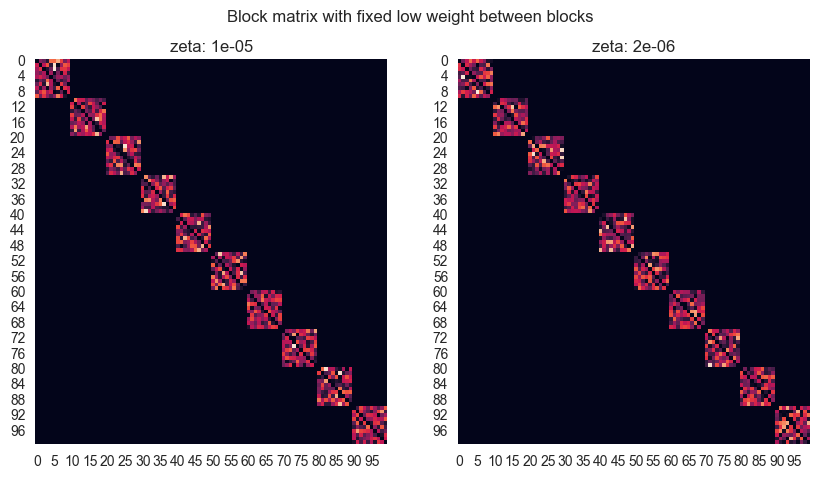

In [31]:
# plot graphs heatmaps
fig, axs = plt.subplots(1, len(zeta), figsize=(10, 5))
fig.suptitle("Block matrix with fixed low weight between blocks")
for i, G in enumerate(graph_record):
    plot_heatmap(G, ax=axs[i], title=f"zeta: {zeta[i]}")